# Test DBSCAN

In [1]:
import numpy as np
import scipy as sp
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.cluster import DBSCAN
import seaborn as sb

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import mymetrics
%autoreload 2

## 2D blobs, circles, moons, uniform

In [3]:
np.random.seed(0)
n_samples = 500

nexample = 4
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.075)
noisy_moons   = datasets.make_moons(n_samples=n_samples, noise=.075)
blobs         = datasets.make_blobs(n_samples=n_samples, random_state=0, cluster_std=0.5)
no_structure  = np.random.rand(n_samples, 2), None
#
DATA = list((noisy_circles,noisy_moons,blobs,no_structure))
for i in DATA:
    print(i[0].shape)

(500, 2)
(500, 2)
(500, 2)
(500, 2)


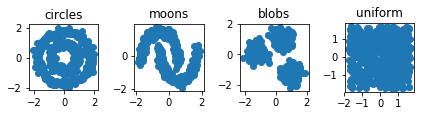

In [4]:
titles = ("circles","moons","blobs","uniform")
fig, axs = plt.subplots(1, 4)
for i in range(nexample):
    data = sklearn.preprocessing.StandardScaler().fit_transform(DATA[i][0])
    x = data[:,0]
    y = data[:,1]
    axs[i].scatter(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_aspect('equal', 'box')
    DATA[i] = data
fig.tight_layout()

### circles

#### reference

In [49]:
X = DATA[0]
ref_estimator = DBSCAN(eps=0.25, min_samples=10,algorithm='brute',n_jobs=1)
ref_clusters = ref_estimator.fit_predict(X)
labels = set(ref_clusters)
ncl = len(labels)
ncl, len(ref_clusters[ref_clusters==-1])#,ref_clusters

(13, 57)

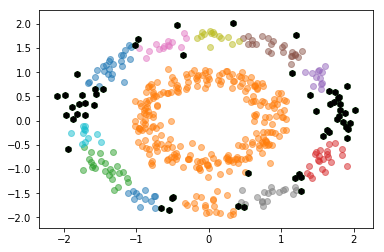

In [15]:
for i in labels:
    plt.scatter(X[ref_clusters==i,0],X[ref_clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[ref_clusters==-1,0],X[ref_clusters==-1,1],marker='h',c='k')
#plt.axis('equal')

#### my DBSCAN

In [50]:
my_estimator = myclusters.DBSCAN(minPTS=10,epsilon=0.25)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn

(11, 60)

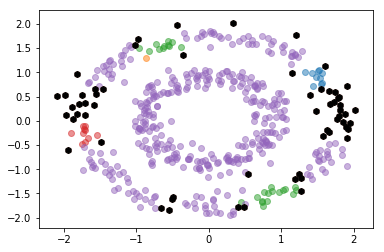

In [51]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')
#plt.axis('equal')

In [10]:
aa

NameError: name 'aa' is not defined

### moons

#### reference

In [ ]:
X = DATA[1]
ref_estimator = DBSCAN(eps=0.25, min_samples=10)
ref_clusters = ref_estimator.fit_predict(X)
labels = set(ref_clusters)
ncl = len(labels)
ncl, ref_clusters

In [ ]:
for i in labels:
    plt.scatter(X[ref_clusters==i,0],X[ref_clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[ref_clusters==-1,0],X[ref_clusters==-1,1],marker='h',c='k')    

#### my DBSCAN

In [ ]:
my_estimator = myclusters.DBSCAN(minPTS=10,epsilon=0.25)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

In [ ]:
np.where(cl!=ref_clusters)

### blobs

#### reference

In [ ]:
X = DATA[2]
ref_estimator = DBSCAN(eps=0.25, min_samples=10)
ref_clusters = ref_estimator.fit_predict(X)
labels = set(ref_clusters)
ncl = len(labels)
ncl, ref_clusters

In [ ]:
for i in labels:
    plt.scatter(X[ref_clusters==i,0],X[ref_clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[ref_clusters==-1,0],X[ref_clusters==-1,1],marker='h',c='k')    

#### my DBSCAN

In [ ]:
my_estimator = myclusters.DBSCAN(minPTS=10,epsilon=0.25)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

In [ ]:
np.where(cl!=ref_clusters)

### uniform

#### reference

In [ ]:
X = DATA[3]
ref_estimator = DBSCAN(eps=0.25, min_samples=10)
ref_clusters = ref_estimator.fit_predict(X)
labels = set(ref_clusters)
ncl = len(labels)
ncl, ref_clusters

In [ ]:
for i in labels:
    plt.scatter(X[ref_clusters==i,0],X[ref_clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.25)
plt.scatter(X[ref_clusters==-1,0],X[ref_clusters==-1,1],marker='h',c='k')    

#### my DBSCAN

In [ ]:
my_estimator = myclusters.DBSCAN(minPTS=10,epsilon=0.25)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

In [ ]:
np.where(cl!=ref_clusters)